<a href="https://colab.research.google.com/github/ManasviAtGitHub/Business-Intelligence/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Demonstration in Python

In [ ]:
# Importing the required libraries

In [ ]:
import numpy as np, pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
data = pd.read_csv("Iris.csv")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
y = data.pop("Species")

In [ ]:
data.pop("Id")

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = data.copy()

In [ ]:
x = scaler.fit_transform(X)

In [ ]:
x[:5,:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Applying PCA on the data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
?PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(x)

PCA(random_state=42)

In [ ]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

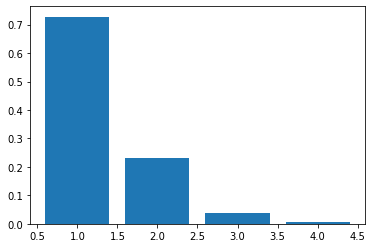

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

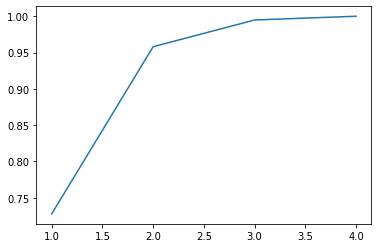

In [ ]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 2 components

In [ ]:
pc2 = PCA(n_components=2, random_state=42)

In [ ]:
newdata = pc2.fit_transform(x)

In [ ]:
newdata.shape

(150, 2)

In [ ]:
pc2.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [ ]:
pc2.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
pc2.singular_values_

array([20.89551896, 11.75513248])

In [ ]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
df_final = pd.concat([df, y], axis=1)

In [ ]:
df_final.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Plotting the data

In [ ]:
import seaborn as sns

In [ ]:
sns.set(color_codes=True)

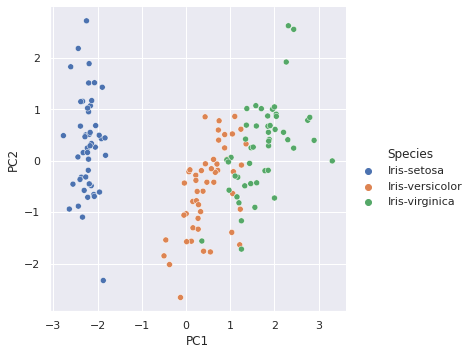

In [ ]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "Species", height=5)